# Ejercicio de Trabajo en Clases 05: CNN

<font color='red'>WARNING-1: No se aceptan soluciones que usen metodologías distintas a las vistas en clases.</font>

<font color='orange'>Está permitido usar los códigos de los ejemplos vistos en clases.</font>



En este problema de clasificación hay 3 clases:

Clase 0: 'bikes' - personas con bicicleta

Clase 1: 'noperson' - imágenes de la ciudad sin peatones ni bicicletas

Clase 2: 'person' - peatones (sin bicicleta)

<font color='orange'>En este ejercicio realice un clasificador de estas tres clases usando una CNN.</font>

<font color='red'>La solución debe basarse en los ejemplos vistos en clases.</font>






# 1) Ingrese Nombre de Grupo e Integrantes

<font color='red'>WARNING-2: CAMBIA EL NOMBRE DEL ARCHIVO ipynb INCLUYENDO TU RUT</font>

Ejemplo, si tu RUT es 12.345.678-9, el nombre de este archivo debe cambiarse de "E05_Tu_Rut.ipynb" a "E05_12345678-9.ipynb"



# 2) Carga de datos y librerías a utilizar

(2 puntos)

Incluya aquí todas las librerías a utilizar en este código. Cargue también aquí las funciones de `cnn_utils_01.py` proporcionadas en los ejemplos vistos en clases. 

Los datos a utilizar se encuentran en `https://www.dropbox.com/s/p94odo87ekacd46/bikes3.zip` están dividos en tres carpetas: `train`, `val`  y `test`, y cada uno de ellos está subdividido en tres carpetas: `bikes`, `noperson` y `person`.




In [1]:
!wget https://www.dropbox.com/s/p94odo87ekacd46/bikes3.zip
!unzip -qq bikes3.zip

--2022-09-29 23:52:11--  https://www.dropbox.com/s/p94odo87ekacd46/bikes3.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/p94odo87ekacd46/bikes3.zip [following]
--2022-09-29 23:52:11--  https://www.dropbox.com/s/raw/p94odo87ekacd46/bikes3.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7ade1db3a5b2cd057c59666c3c.dl.dropboxusercontent.com/cd/0/inline/Bt7kWBFoiFcnscxsSB5OjXfKJ6M7sWQNiUhKqGI1_9x35f9y_L4Jr2cqMe1bWXy8ZQvu0u2s3TAVZesQCafcPLZfcD93o-Y9afXjPFRnI8wSlZHG-DmSuf_bUj7u08zh8zNYd7CmVsVFh77YZ-KfnrpSVVhj5xVhVnGAt8EH4Ncf-Q/file# [following]
--2022-09-29 23:52:12--  https://uc7ade1db3a5b2cd057c59666c3c.dl.dropboxusercontent.com/cd/0/inline/Bt7kWBFoiFcnscxsSB5OjXfKJ6M7sWQNiUhKqGI1_9x35f9y_L4Jr2cqMe1bWXy8ZQvu0u2s3TAVZesQCafcPL

In [2]:
!wget https://www.dropbox.com/s/3wecoj4ytgnl5oi/cnn_utils_01.py
from cnn_utils_01 import display_img,show_batch,plot_accuracies,plot_losses,print_confusion
from cnn_utils_01 import fit,ImageClassificationBase,nn
from cnn_utils_01 import load_model,get_labels,get_prediction,performance

print('cnn_utils module has been loaded')

--2022-09-29 23:52:14--  https://www.dropbox.com/s/3wecoj4ytgnl5oi/cnn_utils_01.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3wecoj4ytgnl5oi/cnn_utils_01.py [following]
--2022-09-29 23:52:14--  https://www.dropbox.com/s/raw/3wecoj4ytgnl5oi/cnn_utils_01.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6115d266fe928ef8a9b0cd43cc.dl.dropboxusercontent.com/cd/0/inline/Bt4ctSQDXDgexjMQRhJxXam3GclWGwl5Oq23UlATWIIZL6KOc8eazJXa7oZ6d_ETqx0BSlzlwsTuZ2WdKW8tiHngBk8EjrmOkb062XASb5nyUWBNsDotS9VMlccj3BKugDRtieo8XcEyKnMjlMvaqWZFprHOeVErLufss6cVrW0quw/file# [following]
--2022-09-29 23:52:14--  https://uc6115d266fe928ef8a9b0cd43cc.dl.dropboxusercontent.com/cd/0/inline/Bt4ctSQDXDgexjMQRhJxXam3GclWGwl5Oq23UlATWIIZL6KOc8eazJXa7oZ6d_ETqx0BSlz

In [3]:
import torch
import torchvision
from   torchvision import transforms
from   torchvision.datasets import ImageFolder
from   torch.utils.data.dataloader import DataLoader
from   torch.utils.data import random_split
from   sklearn.metrics import confusion_matrix, accuracy_score

# 3) Definición de conjuntos de Train/Val/Test

(1 punto)

- Defina los tres conjuntos usando la función `ImageFolder`
- Despliegue una de las imágenes de la base de datos
- Cargue las imagenes de train y validation en batches de 150
- Despliegue un batch (de 150 imagenes) en 10 filas de 15 imagenes cada una

Size image: torch.Size([3, 128, 128])
   Classes:  ['bikes', 'noperson', 'person']
Image: 0, Label : bikes


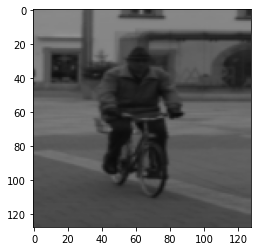

In [4]:
#train and test data directory
train_dir = "bikes3/train"
test_dir  = "bikes3/test"
val_dir  = "bikes3/val"

size = 128

#load the train and test data
train_set = ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((size,size)),transforms.ToTensor()]))

test_set = ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((size,size)),transforms.ToTensor()]))

val_set = ImageFolder(val_dir,transforms.Compose([
    transforms.Resize((size,size)),transforms.ToTensor()]))

img,_ = train_set[0]
print('Size image: '+ str(img.shape))
print('   Classes: ',train_set.classes)

display_img(train_set,0)

In [5]:
batch_size = 150
val_size   = 150 
train_size = len(train_set) - val_size 

train_data,val_data = random_split(train_set,[train_size,val_size])
print(f"Length of Train Data      : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl   = DataLoader(val_data, batch_size, num_workers = 2, pin_memory = True)

Length of Train Data      : 300
Length of Validation Data : 150


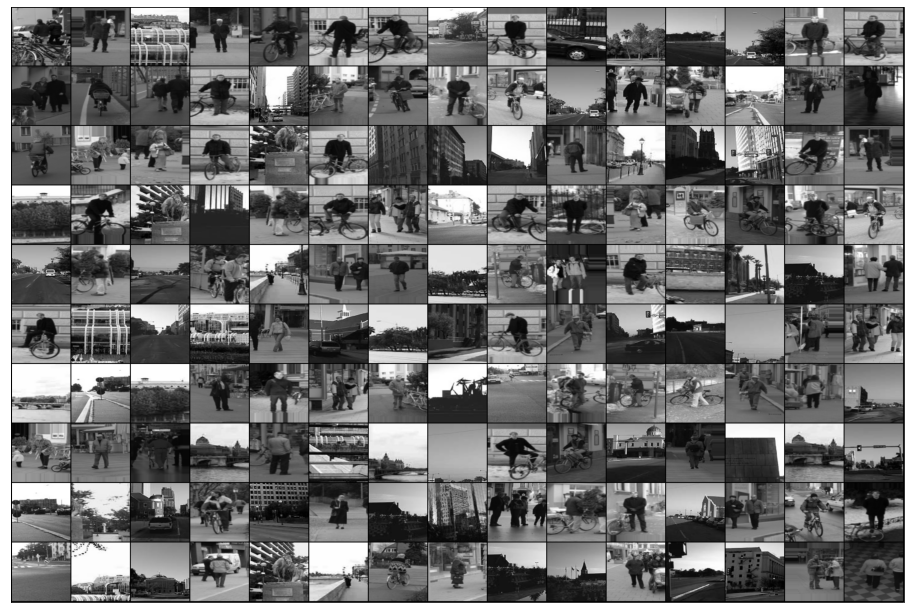

In [6]:
show_batch(train_dl,nrow=15)

# 4) Definición del modelo CNN

(4 puntos)

Defina la clase de la arquitectura del modelo CNN a utilizar.

In [7]:
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(in_channels=3, out_channels=4, kernel_size = 5, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=4, out_channels=8, kernel_size = 5, stride = 5, padding = 3),
            nn.ReLU(),
            nn.MaxPool2d(2,2),            

            nn.Flatten(),
            nn.Linear(1352,3),
        )
    
    def forward(self, xb):
        return self.network(xb)

# 5) Entrenamiento

(5 puntos)

Entrene el modelo definido en el paso anterior

In [8]:
model =  CNN_Classification()
print(model)

CNN_Classification(
  (network): Sequential(
    (0): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(4, 8, kernel_size=(5, 5), stride=(5, 5), padding=(3, 3))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=1352, out_features=3, bias=True)
  )
)


In [9]:
num_epochs = 150
opt_func   = torch.optim.Adam
lr         =  0.005
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------
    0      1.1017      1.1422      0.2667    ***       2.0 
    1      1.0696      1.1134      0.2600              1.7 
    2      1.0066      1.0359      0.4733    ***       1.7 
    3      0.9261      1.0378      0.5200    ***       1.7 
    4      0.8325      0.8469      0.5800    ***       1.7 
    5      0.7057      0.7986      0.6267    ***       1.7 
    6      0.5992      0.8902      0.6400    ***       1.7 
    7      0.6903      0.7984      0.6267              1.7 
    8      0.5544      0.9171      0.6400              1.7 
    9      0.5620      0.7210      0.6667    ***       1.7 
   10      0.5062      0.7383      0.6800    ***       1.7 
   11      0.4974      0.6644      0.7067    ***       1.7 
   12      0.4797      0.6637      0.6933              1.7 
   13      0.4688      0.7220      0.6467              1.7 
   14      0.4597      0.6784 

# 6) Gráficas de desempeño

(1 punto)

Despliegue las siguientes gráficas:

* Accuracy de validación vs. Epocas

* Loss de training y validación vs. Epocas

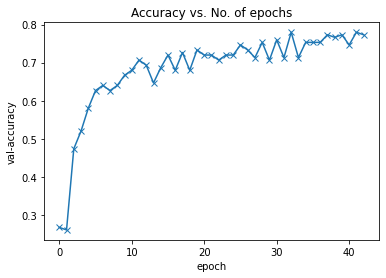

In [18]:
plot_accuracies(history)

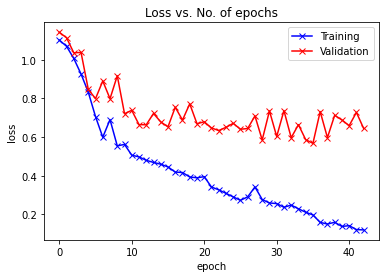

In [19]:
plot_losses(history)

# 7) Evaluación del desempeño

Calcule la matrices de confusión y el accuracy para los conjuntos de training, validatio y testing usando el mejor modelo encontrado en el entrenamiento (`best_model.pt`).

(2 puntos)

### Test

In [20]:
model = load_model(CNN_Classification,'best_model.pt')

ytest = get_labels(model,test_set)
ypred = get_prediction(model,test_set)

acc   = accuracy_score(ytest,ypred) 
C     = confusion_matrix(ytest,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

best_model.pt loaded.
Performance on Testing subset:
Accuracy:
0.8293650793650794
 
Confusion Matrix = 
[[62  3 19]
 [ 7 69  8]
 [ 6  0 78]]


Confusion Matrix:
[[62  3 19]
 [ 7 69  8]
 [ 6  0 78]]
Accuracy = 82.94


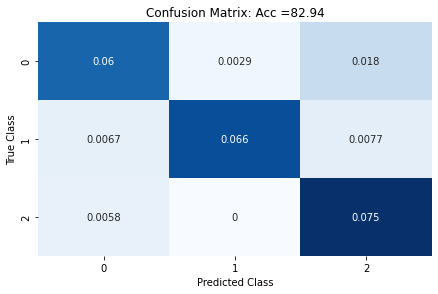

In [21]:
print_confusion(ytest,ypred,show_heatmap=1,Cnorm=1040)

### Validation

In [22]:
yval = get_labels(model,val_set)
ypred = get_prediction(model,val_set)

acc   = accuracy_score(yval,ypred) 
C     = confusion_matrix(yval,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.8
 
Confusion Matrix = 
[[16  4  0]
 [ 3 14  3]
 [ 0  2 18]]


Confusion Matrix:
[[16  4  0]
 [ 3 14  3]
 [ 0  2 18]]
Accuracy = 80.00


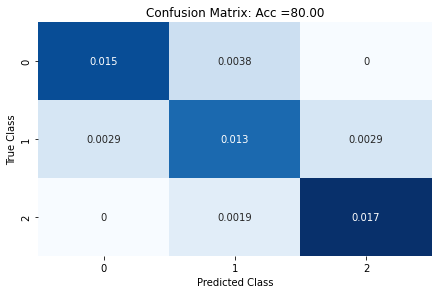

In [23]:
print_confusion(yval,ypred,show_heatmap=1,Cnorm=1040)

### Train

In [16]:
ytrain = get_labels(model,train_set)
ypred = get_prediction(model,train_set)

acc   = accuracy_score(ytrain,ypred) 
C     = confusion_matrix(ytrain,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.8488888888888889
 
Confusion Matrix = 
[[105   4  41]
 [  0 144   6]
 [  7  10 133]]


Confusion Matrix:
[[105   4  41]
 [  0 144   6]
 [  7  10 133]]
Accuracy = 84.89


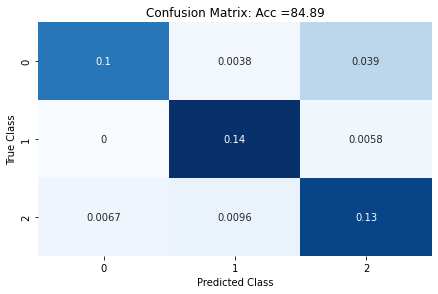

In [17]:
print_confusion(ytrain,ypred,show_heatmap=1,Cnorm=1040)

# <font color='red'>SUBIR EJERCICIO DE FORMA INDIVIDUAL A CANVAS</font> 

